<a href="https://colab.research.google.com/github/souhirkammoun/MultilayerPerceptronExamples/blob/master/MultilayerperceptronChiffre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

nb_classes = 10

In [0]:
#Load the MNIST Dataset
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
#Data preperation
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

print(y_train)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 1 0 0 0 0 0 0]


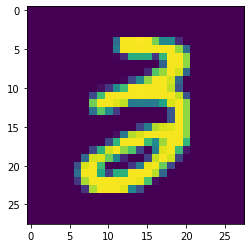

In [0]:
plt.imshow(X_train[5].reshape(28, 28))
print(np.asarray(range(10)))
print(Y_train[5].astype('int'))

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_

In [0]:
#Training the model 
network_history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/50





45000/45000 [==============================] - 6s 133us/step - loss: 2.1910 - acc: 0.2249 - val_loss: 2.0454 - val_acc: 0.4819
Epoch 2/50
45000/45000 [==============================] - 5s 112us/step - loss: 1.9598 - acc: 0.4472 - val_loss: 1.7991 - val_acc: 0.6664
Epoch 3/50
45000/45000 [==============================] - 5s 112us/step - loss: 1.7277 - acc: 0.5908 - val_loss: 1.5474 - val_acc: 0.7327
Epoch 4/50
45000/45000 [==============================] - 5s 108us/step - loss: 1.4964 - acc: 0.6633 - val_loss: 1.3155 - val_acc: 0.7683
Epoch 5/50
45000/45000 [==============================] - 5s 118us/step - loss: 1.2972 - acc: 0.7050 - val_loss: 1.1234 - val_acc: 0.7900
Epoch 6/50
45000/45000 [==============================] - 5s 114us/step - loss: 1.1340 - acc: 0.7335 - val_loss: 0.9760 - val_acc: 0.8115
Epoch 7/50
45000/450

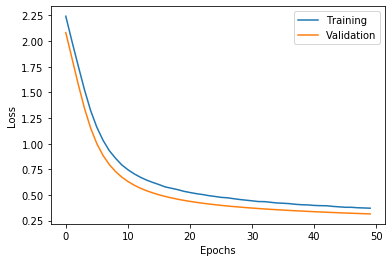

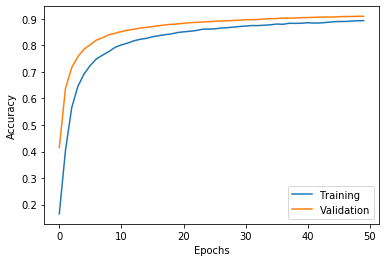

In [0]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

9


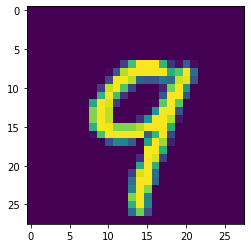

In [0]:
#predection 

from keras.preprocessing import image

plt.imshow(X_test[10].reshape(28, 28))
img = X_test[10].reshape(-1, 784)

prediction = model.predict(img)
print(np.argmax(prediction))